[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/125CRFp4i5LisQlMO-KRT9xxwdEC0T7_8?usp=sharing)
# Rent Cast | Property Records, Estimates, & Market Stats

## Overview
| Detail Tag            | Information                                                                                        |
|-----------------------|----------------------------------------------------------------------------------------------------|
| Originally Created By | Ariel Herrera arielherrera@analyticsariel.com |
| External References   | API |
| Input Datasets        | Source name |
| Output Datasets       | Source name |
| Input Data Source     | Pandas DataFrame |
| Output Data Source    | Pandas DataFrame |

## History
| Date         | Developed By  | Reason                                                |
|--------------|---------------|-------------------------------------------------------|
| 1st Sep 2023 | Ariel Herrera | Create notebook. |

## Getting Started
1. Copy this notebook -> File -> Save a Copy in Drive
2. Directions

## Useful Resources
- [Google Colab Cheat Sheet](https://towardsdatascience.com/cheat-sheet-for-google-colab-63853778c093)

## <font color="blue">Install Packages</font>

In [15]:
!pip install prophet -q

## <font color="blue">Imports</font>

In [16]:
import requests
import pandas as pd
from getpass import getpass
from google.colab import files
import plotly.express as px # visualization
from prophet import Prophet # forecasting
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## <font color="blue">Locals & Constants</font>

In [2]:
rent_cast_api_key = getpass('Enter the rent cast api key: ')

Enter the rent cast api key: ··········


## <font color="blue">API Endpoints</font>

### Market Statistics 📊
[Api Docs](https://developers.rentcast.io/reference/rent-estimate-long-term) | Returns aggregate rental statistics and listing trends for a single US zip code.

In [8]:
zip_code = '33610' # Tampa Ybor City

In [38]:
# get market data from rent cast
url = "https://api.rentcast.io/v1/markets"
querystring = {
    "zipCode": zip_code,
    "historyRange": 60 # number of months
}
headers = {
    "accept": "application/json",
    "X-Api-Key": rent_cast_api_key
}
response_market_stats = requests.get(url, headers=headers, params=querystring)
response_market_stats.text

'{"id":"33610","zipCode":"33610","rentalData":{"averageRent":1931,"minRent":850,"maxRent":4700,"totalListings":320,"dataByBedrooms":[{"bedrooms":1,"averageRent":1564,"minRent":850,"maxRent":1828,"totalListings":61},{"bedrooms":2,"averageRent":1731,"minRent":1150,"maxRent":2200,"totalListings":88},{"bedrooms":3,"averageRent":2115,"minRent":950,"maxRent":4000,"totalListings":134},{"bedrooms":4,"averageRent":2360,"minRent":875,"maxRent":4700,"totalListings":36},{"bedrooms":5,"averageRent":1795,"minRent":1795,"maxRent":1795,"totalListings":1}],"history":{"2020-04":{"averageRent":1367.13,"minRent":744,"maxRent":49900,"totalListings":186,"dataByBedrooms":[{"bedrooms":0,"averageRent":826,"minRent":744,"maxRent":959,"totalListings":3},{"bedrooms":1,"averageRent":920,"minRent":800,"maxRent":1040,"totalListings":2},{"bedrooms":2,"averageRent":1121.51,"minRent":842,"maxRent":1450,"totalListings":35},{"bedrooms":3,"averageRent":2103.31,"minRent":950,"maxRent":49900,"totalListings":124},{"bedrooms"

In [39]:
# get all dates for market stats to a list
market_date_list = list(response_market_stats.json()['rentalData']['history'].keys())
market_date_list

['2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-11',
 '2021-12',
 '2021-10',
 '2021-09',
 '2021-08',
 '2021-07',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07',
 '2022-08',
 '2022-09',
 '2022-10',
 '2022-11',
 '2022-12',
 '2023-01',
 '2023-02',
 '2023-03',
 '2023-04',
 '2023-05',
 '2023-06',
 '2023-07',
 '2023-08']

In [40]:
# get rental details for latest date
response_market_stats.json()['rentalData']['history'][market_date_list[-1]]

{'averageRent': 1931,
 'minRent': 850,
 'maxRent': 4700,
 'totalListings': 320,
 'dataByBedrooms': [{'bedrooms': 1,
   'averageRent': 1564,
   'minRent': 850,
   'maxRent': 1828,
   'totalListings': 61},
  {'bedrooms': 2,
   'averageRent': 1731,
   'minRent': 1150,
   'maxRent': 2200,
   'totalListings': 88},
  {'bedrooms': 3,
   'averageRent': 2115,
   'minRent': 950,
   'maxRent': 4000,
   'totalListings': 134},
  {'bedrooms': 4,
   'averageRent': 2360,
   'minRent': 875,
   'maxRent': 4700,
   'totalListings': 36},
  {'bedrooms': 5,
   'averageRent': 1795,
   'minRent': 1795,
   'maxRent': 1795,
   'totalListings': 1}]}

In [41]:
# get market rental history to a dataframe
df_market_list = [] # create empty list

# iterate through all dates
for dt in market_date_list:
  # transform month/year rental history to a single dataframe
  _df_market = pd.DataFrame(response_market_stats.json()['rentalData']['history'][dt]['dataByBedrooms'])
  _df_market['date'] = dt # add date
  _df_market.insert(0, 'date', _df_market.pop('date')) # move date to be first column
  df_market_list.append(_df_market) # append to list

# merge all rental history dates
df_market_by_dt = pd.concat(df_market_list)
df_market_by_dt

,date,bedrooms,averageRent,minRent,maxRent,totalListings
0,2020-04,0,826.00,744,959,3
1,2020-04,1,920.00,800,1040,2
2,2020-04,2,1121.51,842,1450,35
3,2020-04,3,2103.31,950,49900,124
4,2020-04,4,1445.26,1100,2150,19
...,...,...,...,...,...,...
0,2023-08,1,1564.00,850,1828,61
1,2023-08,2,1731.00,1150,2200,88
2,2023-08,3,2115.00,950,4000,134
3,2023-08,4,2360.00,875,4700,36


In [42]:
# filter on number of bedrooms
df_market_by_dt_fig = df_market_by_dt.loc[df_market_by_dt["bedrooms"].isin([1,2,3,4])]
df_market_by_dt_fig = df_market_by_dt_fig.sort_values(by=["date"]) # sort before plotting
# create figure
fig = px.line(df_market_by_dt_fig, x="date", y="averageRent", color='bedrooms', title=f"Average Rent by Bedroom for <b>{zip_code}</b>")
fig.show()

In [43]:
# get yoy change for average rent
df_market_by_dt_yoy_fig = df_market_by_dt_fig.copy()
df_market_by_dt_yoy_fig['rent_pct_yoy'] = df_market_by_dt_yoy_fig['averageRent'].pct_change(12)
# create figure
fig = px.line(df_market_by_dt_yoy_fig, x="date", y="rent_pct_yoy", color='bedrooms', title=f"YoY Average Rent by Bedroom for <b>{zip_code}</b>")
fig.show()

#### Forecasting
[Facebook Prophet](https://facebook.github.io/prophet/) is an open-source time series forecasting library developed by Facebook. It is a forecasting procedure that is based on an <b>additive model where non-linear trends</b> are fitted with yearly, weekly, and daily seasonality, plus holiday effects. It is designed to be easy and <b>completely automatic</b>, e.g., fitting a model to a time series is as simple as calling the fit method on a Prophet instance.

Here are some of the features of Facebook Prophet:



*   <b>Automatic</b>: Facebook Prophet is designed to be easy and completely automatic.
*   <b>Accurate</b>: Facebook Prophet has been shown to be accurate in a variety of forecasting tasks. It has been used to forecast web traffic, social media engagement, and financial data.
*   <b>Fast</b>: Facebook Prophet is fast, producing forecasts in just a few seconds.
*   <b>Flexible</b>: Facebook Prophet is flexible and can be used to forecast a variety of time series data.
*   <b>Robust</b>: Facebook Prophet is robust to outliers and missing data.

In [44]:
# filter on interested bedrooms
df_market_3_bd = df_market_by_dt.loc[df_market_by_dt['bedrooms'] == 3]
df_market_3_bd['ds'] = df_market_3_bd.apply(lambda x: x['date'] + '-01', axis=1)
df_market_3_bd['y'] = df_market_3_bd.apply(lambda x: int(x['averageRent']), axis=1)
print('Num of rows:', len(df_market_3_bd))
df_market_3_bd = df_market_3_bd[['ds', 'y']]
df_market_3_bd

Num of rows: 41


<ipython-input-44-3367ec6fe174>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-3367ec6fe174>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
3,2020-04-01,2103
3,2020-05-01,1356
3,2020-06-01,1366
3,2020-07-01,1366
3,2020-08-01,1368
3,2020-09-01,1406
3,2020-10-01,1403
3,2020-11-01,1458
3,2020-12-01,1449
3,2021-01-01,1449


In [45]:
idx = round(len(df_market_3_bd) * 0.90)
train = df_market_3_bd[:idx]
test = df_market_3_bd[idx:]
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (37, 2)
Test: (4, 2)


In [46]:
df_market_3_bd.tail()

,ds,y
2,2023-04-01,2116
2,2023-05-01,2139
2,2023-06-01,2141
2,2023-07-01,2138
2,2023-08-01,2115


In [47]:
title = 'Rental Data'

<Axes: title={'center': 'Rental Data'}, xlabel='ds'>

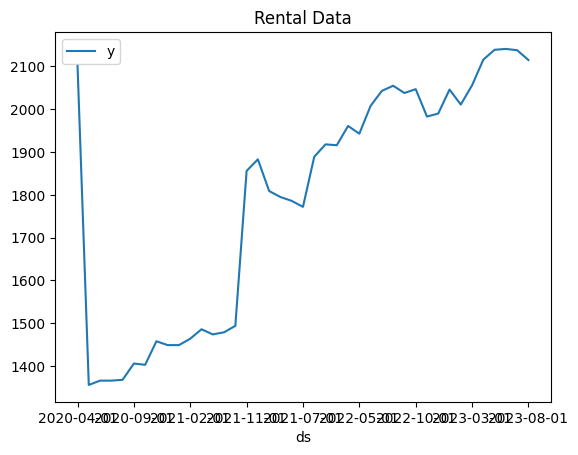

In [48]:
df_market_3_bd.set_index('ds').plot(title=title)

In [49]:
model = Prophet().fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18it7duq/6t77l5b6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp18it7duq/fixtn010.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22255', 'data', 'file=/tmp/tmp18it7duq/6t77l5b6.json', 'init=/tmp/tmp18it7duq/fixtn010.json', 'output', 'file=/tmp/tmp18it7duq/prophet_modelwrik4f72/prophet_model-20230825023634.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:36:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:36:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [51]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [52]:
future = model.make_future_dataframe(len(test), freq='MS')

In [53]:
forecast = model.predict(future)

In [54]:
cols = ['ds', 'yhat', 'yhat_lower', 'yhat_upper']
forecast[cols].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-04-01,1806.395557,1668.327827,1937.744032
1,2020-05-01,1270.439320,1133.384839,1404.376705
2,2020-06-01,1301.546205,1157.925004,1432.398078
3,2020-07-01,1414.959558,1271.844440,1543.563334
4,2020-08-01,1438.144145,1303.802356,1584.325042


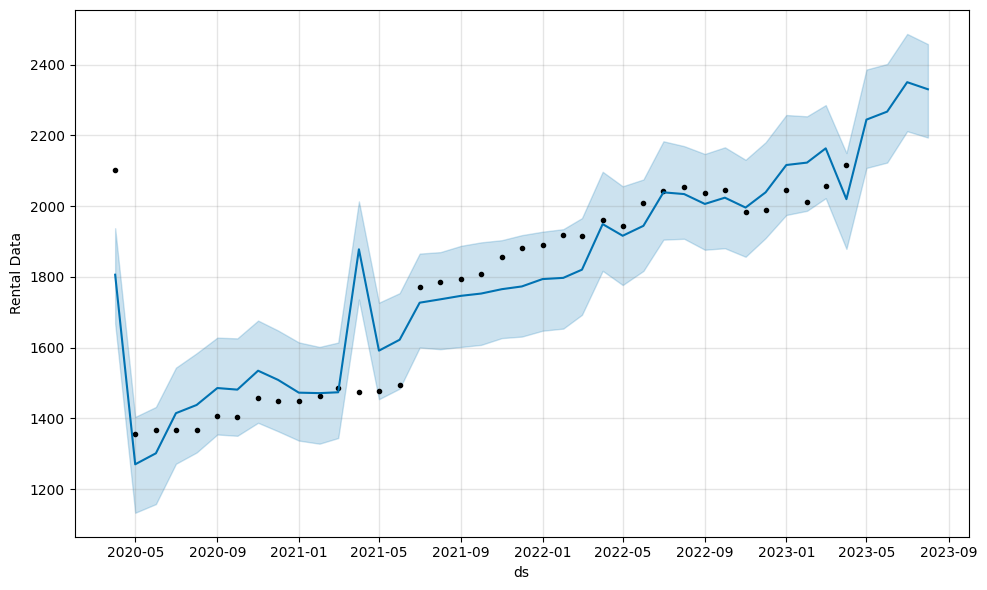

In [55]:
model.plot(forecast, ylabel=title)
plt.show()

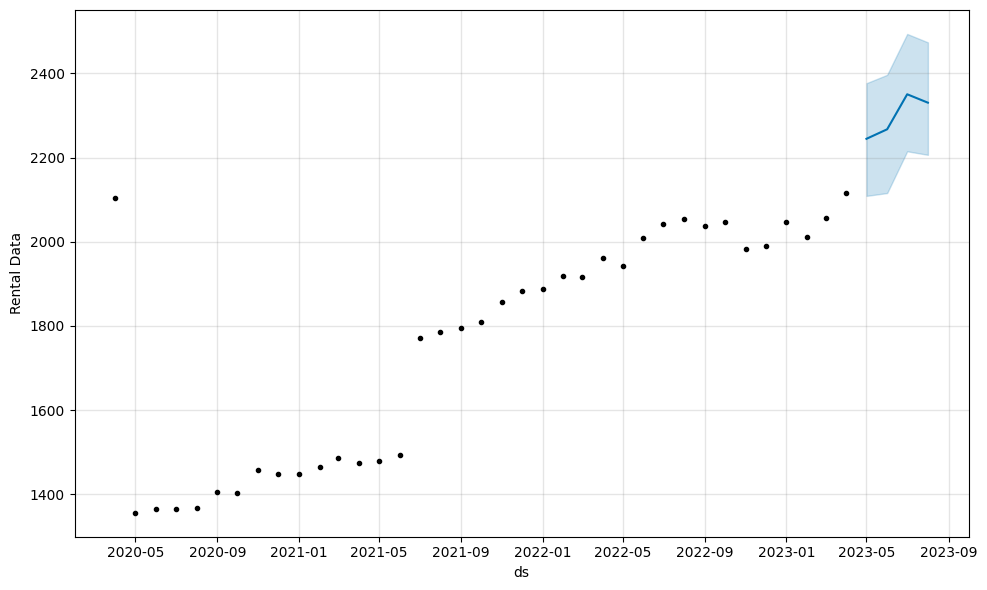

In [56]:
predicted = model.predict(test)
model.plot(predicted, ylabel=title)
plt.show()

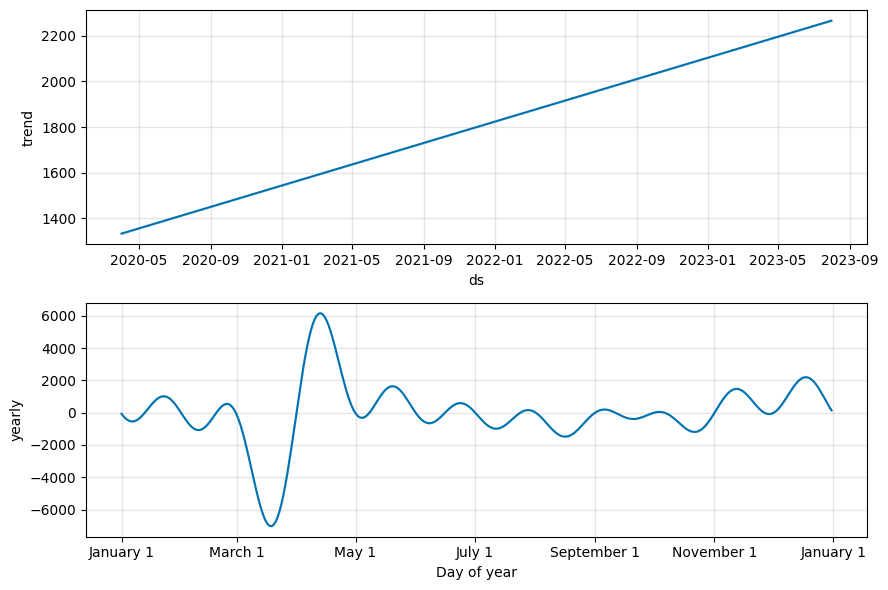

In [57]:
model.plot_components(forecast)
plt.show()

# End Notebook